In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
def plot_evolution(data, title=None, path=''):
    fig, ax = plt.subplots(figsize=(5, 4))
    cmap = sns.color_palette("Set2")
    
    # this is for the legend
    custom_lines = [Line2D([0], [0], color=cmap[0], lw=4),
                    Line2D([0], [0], color=cmap[2], lw=4),
                    Line2D([0], [0], color=cmap[1], lw=4),
                    Line2D([0], [0], color='black', lw=2, alpha=0.5)]
    ax.legend(custom_lines, ['Best', 'Mean', 'Worst', 'Individual'], loc='lower center', bbox_to_anchor=(0.5, 0.0),
              ncol=4, fancybox=True)
    
    # here comes the data
    sns.lineplot(x="Generation", y="Max_fit", data=data, ax=ax, color=cmap[0])
    sns.lineplot(x="Generation", y="Mean_fit", data=data, ax=ax, color=cmap[2])
    sns.lineplot(x="Generation", y="Worst_fit", data=data, ax=ax, color=cmap[1])
    for e in data["Experiment"].unique():
        x = data["Generation"].unique()
        y = data.loc[data["Experiment"]==e]["Mean_fit"]
        ax.plot(x, y, c='black', alpha=0.3, lw=0.5)
    
    plt.ylabel("Fitness")
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.savefig(path)

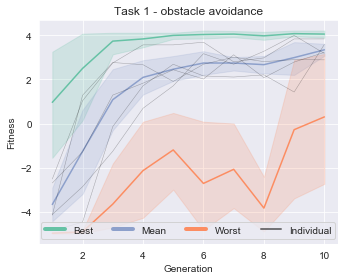

In [8]:
data = pd.read_csv("Dataset_task1.csv")#, index_col=False)
data["Experiment"] = data["Experiment"] + 1
data["Generation"] = data["Generation"] + 1
data.head()
plot_evolution(data, title='Task 1 - obstacle avoidance', path="evolution_task1.png")

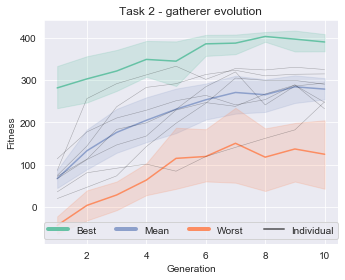

In [43]:
data = pd.read_csv("Dataset_task2.csv", index_col=0)
data["Experiment"] = data["Experiment"] + 1
data["Generation"] = data["Generation"] + 1
data.head()
plot_evolution(data, title='Task 2 - gatherer evolution', path="evolution_task2.png")

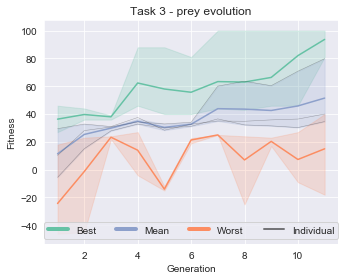

In [44]:
data = pd.read_csv("Dataset_task3.csv", index_col=0)
data["Experiment"] = data["Experiment"] + 1
data["Generation"] = data["Generation"] + 1
data.head()
plot_evolution(data, title='Task 3 - prey evolution', path="evolution_task3.png")